# Chess board lab with numpy and Jupyter

In [2]:
# import needed liberies.
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class ChessBoard:
    
    def __init__(self):
        self.grid = self.grid_init()
        self.red_color = None
        self.blue_color = None
        self.red_loc = None
        self.blue_loc = None
        
    def grid_init(self):
        """The function to init the grid """
        white = (1,1,1)
        grid_init = np.zeros((8,8,3))
        for i in range(0,8,2):
            grid_init[i + 0][::2] = white
            grid_init[i + 1][1::2] = white
        return grid_init
    
    def add_red(self, row, col):
        """ function to check location conflex with blue queen before add a red queen;
        also restore's grid color before add another red queen"""
        red = (1,0,0)
        
        if self.red_loc is not None:
            self.grid[self.red_loc[0],self.red_loc[1]] =self.red_color
        
        self.red_loc = np.array([row,col])
        assert (not np.array_equal(self.blue_loc, self.red_loc)),"Red Queen location can't overlap with the blue Queen"
        self.red_color = np.array(self.grid[row,col])
        self.grid[row,col] = red
        self.render()
        
    
       
    def add_blue(self, row, col):
        """the function to check location conflex with red queen before add a blue queen;
        also restore's grid color before add another blue queen"""
        blue = (0,0,1)
        if self.blue_loc is not None:
            self.grid[self.blue_loc[0],self.blue_loc[1]] =self.blue_color
        self.blue_loc = np.array([row,col])
        assert (not np.array_equal(self.blue_loc, self.red_loc)),"Blue Queen location can't overlap with the red Queen"
        self.blue_color = np.array(self.grid[row,col])
        
        self.grid[row,col] = blue
        self.render()

    def render(self):
        """function to reder the chess board"""
        plt.imshow(self.grid)
        
    def is_under_attack(self):
        """function to check whether red queen is under attack"""
        if self.red_loc is None or self.blue_loc is None:
            raise Exception("No Queen is found")
        elif self.red_loc[0]==self.blue_loc[0] or self.red_loc[1]==self.blue_loc[1] or (abs(self.red_loc[0]-self.blue_loc[0])==abs(self.red_loc[1]-self.blue_loc[1])):
            return "the Red Queen is under attack by the blue Queen"
        else: 
            return "The Red Queen is not under attack"

In [10]:
board = ChessBoard()

the Red Queen is under attack by the blue Queen


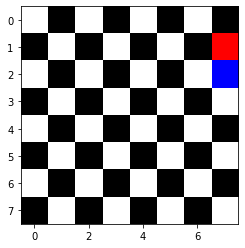

In [11]:
board.add_red(1,7)
board.add_blue(2,7)
tester_1 = board.is_under_attack()
print(tester_1)
assert tester_1 == "the Red Queen is under attack by the blue Queen"

the Red Queen is under attack by the blue Queen


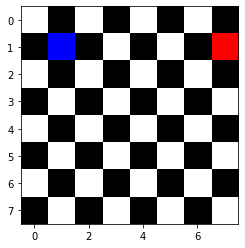

In [13]:
board.add_red(1,7)
board.add_blue(1,1)
tester_2 = board.is_under_attack()
print(tester_2)
assert tester_2 == "the Red Queen is under attack by the blue Queen"

the Red Queen is under attack by the blue Queen


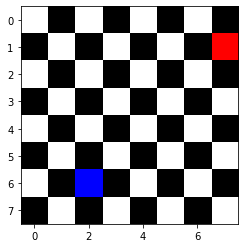

In [14]:
board.add_red(1,7)
board.add_blue(6,2)
tester_3 = board.is_under_attack()
print(tester_3)
assert tester_3 == "the Red Queen is under attack by the blue Queen"

the Red Queen is under attack by the blue Queen


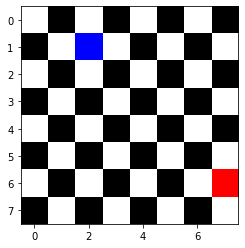

In [15]:
board.add_red(6,7)
board.add_blue(1,2)
tester_4 = board.is_under_attack()
print(tester_4)
assert tester_4 == "the Red Queen is under attack by the blue Queen"

The Red Queen is not under attack


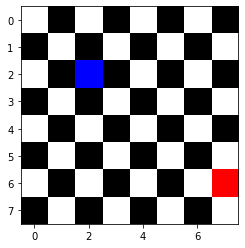

In [16]:
board.add_red(6,7)
board.add_blue(2,2)
tester_5 = board.is_under_attack()
print(tester_5)
assert tester_5 == "The Red Queen is not under attack"